- 다양한 곱셈 시나리오를 통해, right sm todense latency 와 sm * dm latency 측정
- 모든 측정 결과들에 대해, [ right sm todense latency / sm * dm latency ] 계산
- 전체 곱셈 시나리오 중, 20%의 시나리오에서 sm todense latency가 실제 sm * dm latency에 비해  큰 비율을 차지하는 것을 확인
    - 해당 결과는 matrix size, density 등의 다양한 원인들이 존재하기 때문에, 정확한 원인을 설명하긴 어려움

### CDF (cumulative distribution function)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/Users/bdlab/Desktop/matrix-data/spmm-latency/spmm-for-todense-ratio-2000-copy.csv")

,lr,lc,rc,ld,rd,lnnz,rnnz,right_sm_todense,sp_smdm,bz_smsm,right_sm_todense.1,bz_smdm,sp_todense_ratio
0,108176,10277,16847,0.025336,0.0100,28169438,1731551,330,1046768,195786,241,1219710,0.000315
1,113894,7882,5236,0.025336,0.1300,22745018,5365824,166,285441,162839,96,301817,0.000582
2,104630,9380,10427,0.025336,0.1500,24867579,14672396,331,565623,341557,262,627103,0.000585
3,100996,13196,2808,0.008605,0.0005,11468999,18533,53,80591,814,167,199559,0.000658
4,89490,74614,2024,0.009521,0.0010,63574769,151024,195,291891,20373,498,740885,0.000668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1026,83785,3762,0.000319,0.2000,27479,63048115,13796,2157,1211,1651,3377,6.395920
1994,3890,98343,5047,0.000005,0.1300,1775,64530805,14688,1837,474,23856,2623,7.995645
1995,224,50902,8959,0.000084,0.1500,962,68406475,14978,1692,412,16030,2315,8.852246
1996,455,44292,10041,0.000004,0.1000,87,44474989,10498,1177,277,12454,2642,8.919286


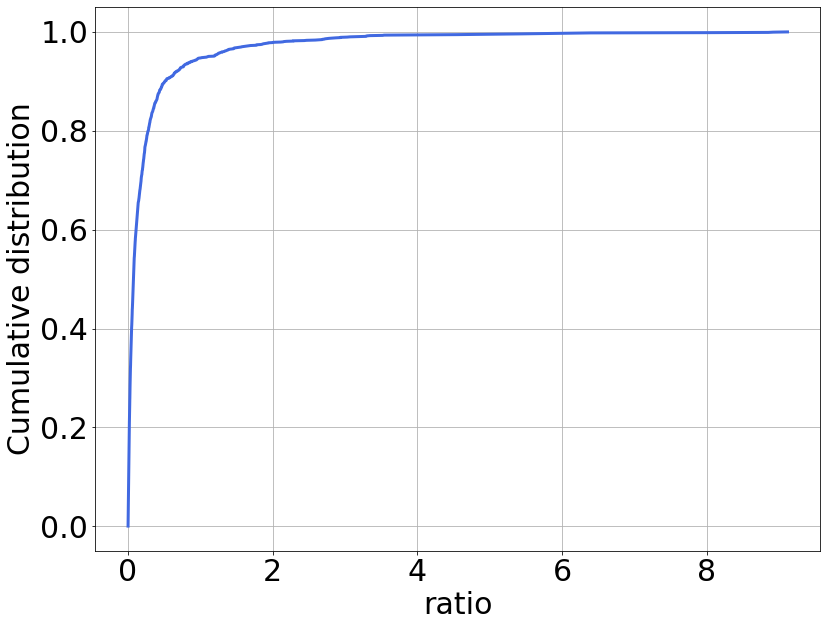

In [115]:
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정
fig = plt.figure(figsize=(13,10))

# x 축으로 사용할 ratio
ratio = df['sp_todense_ratio']

# 배열의 모든 값을 1/1998 로 초기화
y = np.zeros(1998) + (1 / len(ratio))
# 누적 비율 생성
cdf = np.cumsum(y)

plt.grid(True)

plt.xticks([0,2,4,6,8])

plt.xlabel("ratio")
plt.ylabel("Cumulative distribution")

plt.plot(ratio,cdf,linewidth=3, color = "royalblue")
fig.savefig('./sparse-to-dense-overhead-v2-first.png')
plt.show()

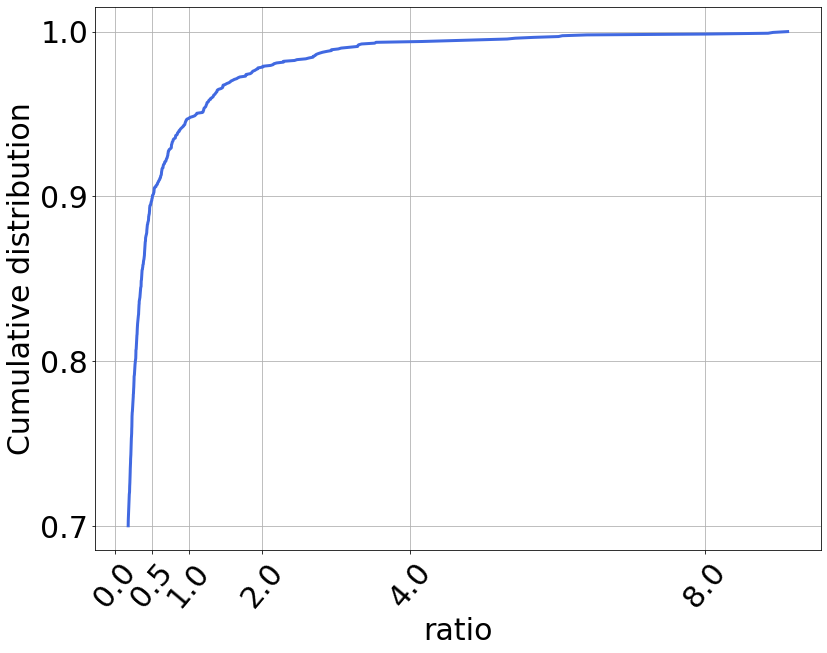

In [116]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import uniform, norm

plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정
fig = plt.figure(figsize=(13,10))

# x 축으로 사용할 ratio
ratio_top_30 = ratio[np.where(cdf > 0.70)[0]]
cdf_top_30 = cdf[np.where(cdf > 0.70)[0]]

plt.grid(True)

plt.xticks([0,0.5,1,2,4,8], rotation=50)
plt.yticks([0.7,0.8,0.9,1.0])

plt.xlabel("ratio")
plt.ylabel("Cumulative distribution")

plt.plot(ratio_top_30,cdf_top_30,linewidth=3, color = "royalblue")
fig.savefig('./sparse-to-dense-overhead-v2-second.png')
plt.show()